# Exploring the coffee production data set

Importing the packages I need

In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.rcParams['font.size'] = '15'

Importing the coffee production dataset

In [3]:
df = pd.read_csv('ICO_CROP_DATA.csv')

Now to do some EDA and checking for missing values 

In [4]:
df.head(5)

,COUNTRY,YEAR,MONTH,TOTAL_PRODUCTION,DOMESTIC_CONSUMPTION,EXPORTABLE_PRODUCTION,GROSS_OPENING_STOCKS
0,Angola,1990/91,April,50.3450,20.0,30.3450,210.000
1,Bolivia,1990/91,April,122.7770,25.0,97.7770,54.000
2,Brazil,1990/91,April,27285.6286,8200.0,19085.6286,26926.000
3,Burundi,1990/91,April,487.3930,2.0,485.3930,77.000
4,Ecuador,1990/91,April,1503.8150,350.0,1153.8150,723.963


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COUNTRY                1568 non-null   object 
 1   YEAR                   1568 non-null   object 
 2   MONTH                  1568 non-null   object 
 3   TOTAL_PRODUCTION       1521 non-null   float64
 4   DOMESTIC_CONSUMPTION   1521 non-null   float64
 5   EXPORTABLE_PRODUCTION  1559 non-null   float64
 6   GROSS_OPENING_STOCKS   1560 non-null   float64
dtypes: float64(4), object(3)
memory usage: 85.9+ KB


In [6]:
df.describe() 

,TOTAL_PRODUCTION,DOMESTIC_CONSUMPTION,EXPORTABLE_PRODUCTION,GROSS_OPENING_STOCKS
count,1521.000000,1521.000000,1559.000000,1560.000000
mean,2244.821485,615.311021,1620.558960,669.945847
std,6230.405278,2159.586060,4302.678374,3505.872743
min,0.000000,0.000000,0.000000,0.000000
25%,44.313000,5.000000,10.628250,0.000000
50%,370.612300,67.000000,135.000000,17.645500
75%,1572.432600,330.000000,1247.014250,153.321000
max,56763.763400,21997.000000,35538.763400,43762.000000


Seems to only be a few missing values and so for ease I will drop them 

In [7]:
df.dropna(inplace=True)

In [8]:
df.describe()

,TOTAL_PRODUCTION,DOMESTIC_CONSUMPTION,EXPORTABLE_PRODUCTION,GROSS_OPENING_STOCKS
count,1516.000000,1516.000000,1516.000000,1516.000000
mean,2252.220858,617.340411,1666.520291,689.390186
std,6239.342578,2162.857004,4354.521203,3554.532404
min,0.000000,0.000000,0.000000,0.000000
25%,44.719275,5.000000,15.080575,0.000000
50%,373.893500,67.000000,159.022600,20.000000
75%,1584.541750,330.000000,1331.352075,161.000000
max,56763.763400,21997.000000,35538.763400,43762.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOTAL_PRODUCTION'>

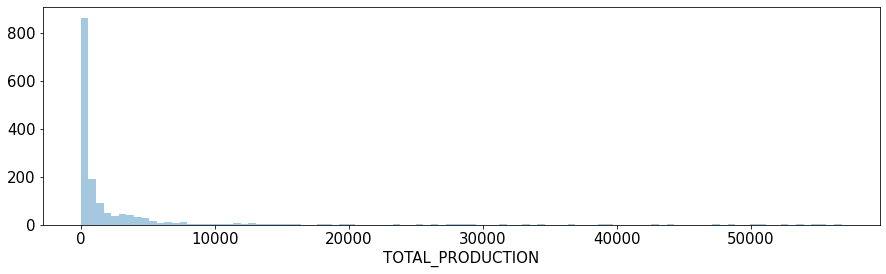

In [9]:
plt.figure(figsize=(15,4))
sns.distplot(df.TOTAL_PRODUCTION,bins = 100, kde = False)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOTAL_PRODUCTION'>

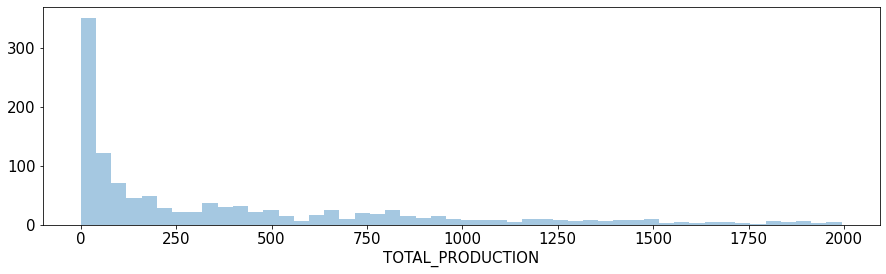

In [10]:
plt.figure(figsize=(15,4))
sns.distplot(df[df.TOTAL_PRODUCTION <= 2000].TOTAL_PRODUCTION,bins = 50, kde = False)

Now looking to see what numerical values look correlated 

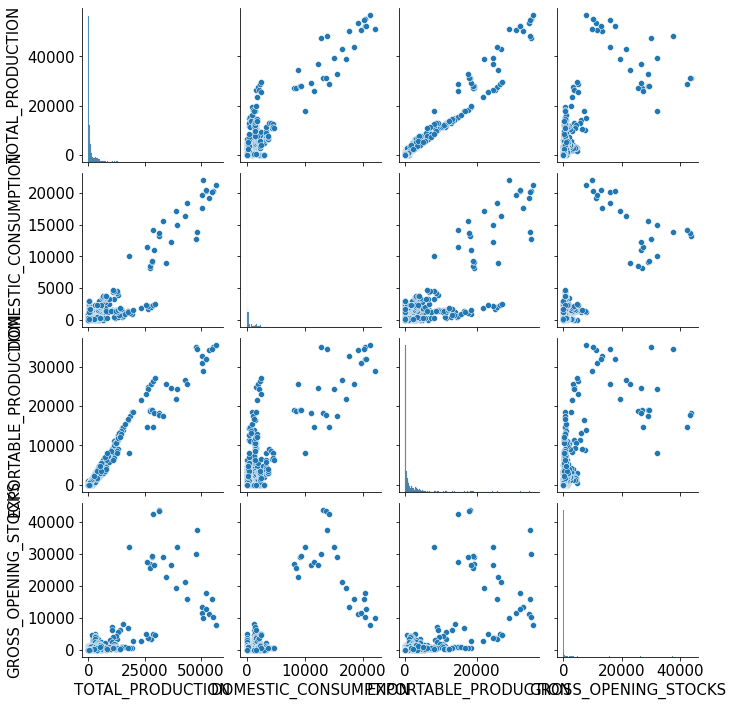

In [11]:
sns.pairplot(df)

In [12]:
df.groupby('COUNTRY').sum()

,TOTAL_PRODUCTION,DOMESTIC_CONSUMPTION,EXPORTABLE_PRODUCTION,GROSS_OPENING_STOCKS
COUNTRY,,,,
Angola,1.272038e+03,715.0000,575.1330,1215.0000
Benin,1.855000e+00,0.0000,1.8550,0.0000
Bolivia,3.618669e+03,1465.0000,2153.6690,209.9000
Brazil,1.118452e+06,419545.0000,698907.3505,669576.6150
Burundi,9.950275e+03,52.8670,9897.4081,1410.4110
Cameroon,2.207199e+04,2235.8490,19836.1405,5266.3490
Central African Republic,2.963393e+03,373.2400,2590.1533,475.1560
Colombia,3.317384e+05,40215.5944,291522.8135,66759.9920
"Congo, Dem. Rep. of",1.672670e+04,5600.0000,11126.6962,987.1580


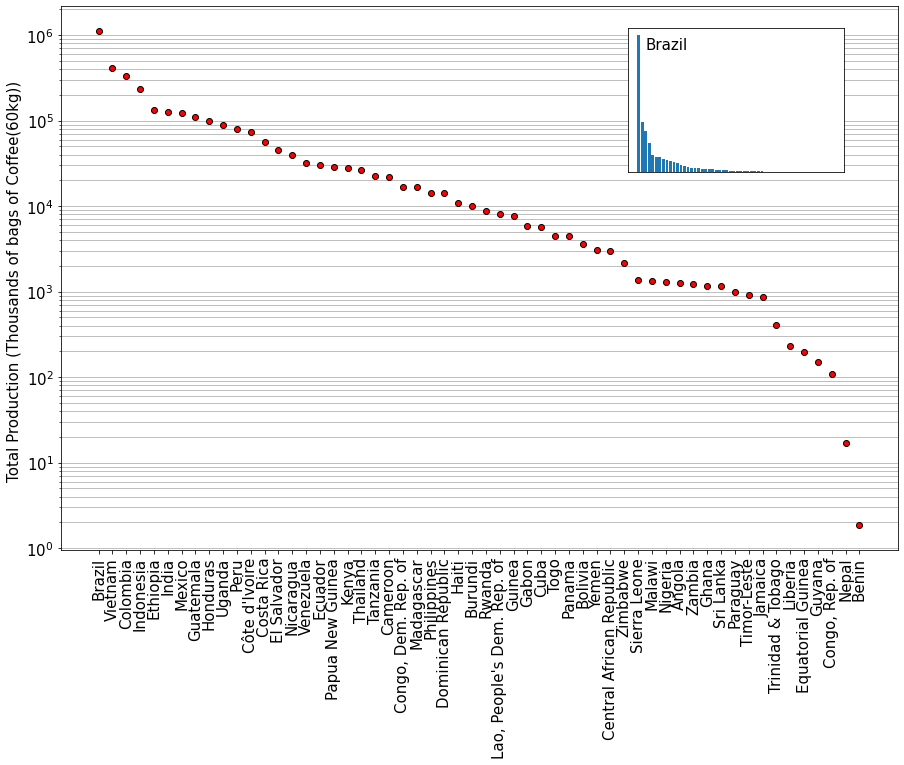

In [13]:
fig = plt.figure(figsize = (15,10))
plt.xticks(rotation = 'vertical',fontsize=15)
plt.yticks(fontsize=15)
df_sorted = df.groupby('COUNTRY').sum().sort_values('TOTAL_PRODUCTION',ascending=False)
plt.plot(df_sorted.index,df_sorted.TOTAL_PRODUCTION,
         color='red',
         marker='o',
         linestyle='none',
         mec='black')
_ = plt.semilogy()
_ = plt.ylabel('Total Production (Thousands of bags of Coffee(60kg)) ',fontsize=15)
_ = plt.grid(which='both',axis='y')


ax = fig.add_axes([0.65,0.65,0.2,0.2])
ax.bar(df_sorted.index,df_sorted.TOTAL_PRODUCTION)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
_ = ax.text(x=2,y=1000000,s='Brazil',fontsize=15)

**Now I want to see if there are any general patterns amongst all producers**. Namely I want to see if there is a big dip in one particular year that could be linked to some global event. 

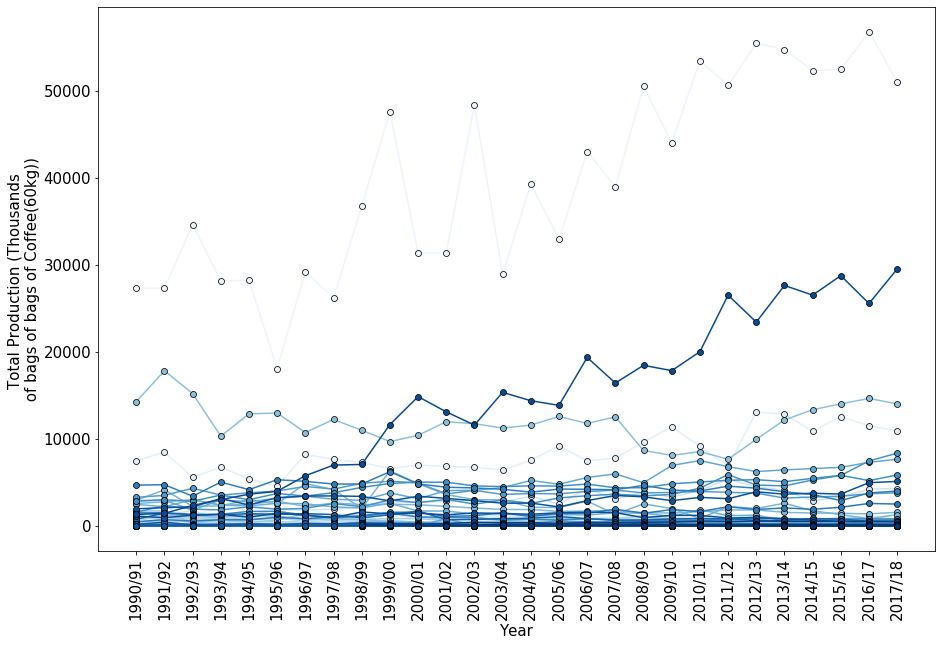

In [14]:
plt.figure(figsize = (15,10))
plt.xticks(rotation ='vertical')
sns.lineplot(x = 'YEAR', y= 'TOTAL_PRODUCTION',
             data = df,
             hue ='COUNTRY',
             palette='Blues',
            mec='k',
             marker='o',
             legend=False
            )

_ = plt.ylabel('Total Production (Thousands \n of bags of bags of Coffee(60kg)) ',rotation = 90,fontsize=15)
_ = plt.xlabel('Year',fontsize=15)


Brazil has contributed 32.76% to total coffee production since 1992


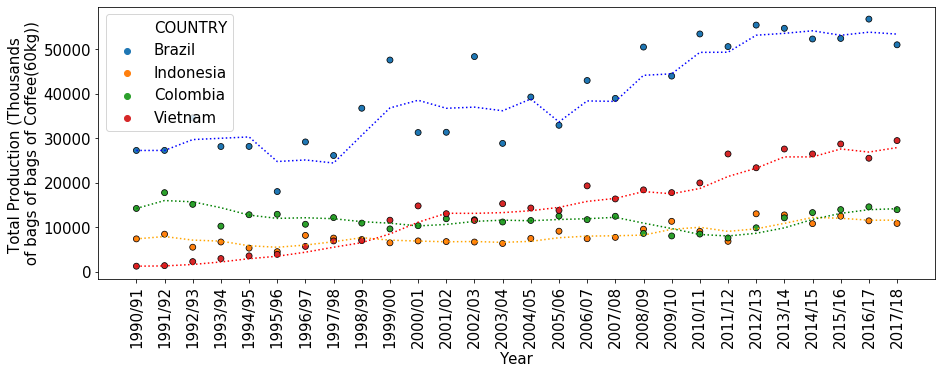

In [15]:
df2 = df.groupby('COUNTRY').sum()
df3 = df2[df2.TOTAL_PRODUCTION >200000]
n = list(df3.index)
large = df[df.COUNTRY.isin(n)]
plt.figure(figsize = (15,5))
plt.xticks(rotation ='vertical')
sns.scatterplot(x = 'YEAR', y= 'TOTAL_PRODUCTION',
             data = large,
             hue ='COUNTRY',
             marker='o',
                **{'edgecolor':'k'}
               )

color= ['blue','orange','green','red']

for i,j in enumerate(['Brazil','Indonesia', 'Colombia','Vietnam']):
    df_temp = df[df.COUNTRY == j]
    plt.plot(df_temp.YEAR,df_temp.loc[:,'TOTAL_PRODUCTION'].rolling(3,0).mean(),
        color=color[i],
        linestyle=':')

_ = plt.ylabel('Total Production (Thousands \n of bags of bags of Coffee(60kg)) ',rotation = 90,fontsize=15)
_ = plt.xlabel('Year',fontsize=15)
x = (df2.loc['Brazil'].TOTAL_PRODUCTION / sum(df2.TOTAL_PRODUCTION))*100
print('Brazil has contributed {}% to total coffee production since 1992'.format(round(x,2)))

In [16]:
x = ((df[df.COUNTRY == 'Vietnam']['TOTAL_PRODUCTION'].max()-df[df.COUNTRY == 'Vietnam']['TOTAL_PRODUCTION'].min())/df[df.COUNTRY == 'Vietnam']['TOTAL_PRODUCTION'].min())*100
print('The percentage increase in coffee production from Vietnam is {}'.format(x))

The percentage increase in coffee production from Vietnam is 2151.4134297192677


There doesn't seem to be anything too obvious. Lets now look at the top producers of coffee.

Appears coffee production is dominated by a few countries such as brazil, colombia and vietnam.

Lets explore that a bit more 

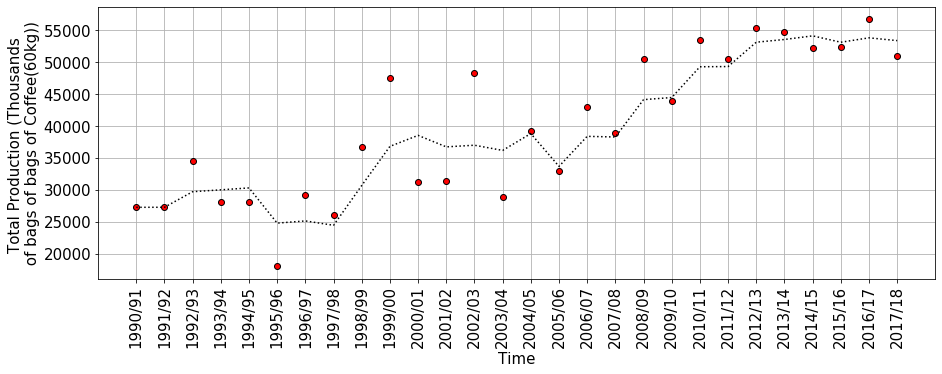

In [17]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 'vertical')
dfBrazil = df[df.COUNTRY == 'Brazil']
plt.plot(dfBrazil.YEAR,dfBrazil.TOTAL_PRODUCTION,
        linestyle='none',
        marker='o',
        mec='k',
        mfc='r')
plt.plot(dfBrazil.YEAR,dfBrazil.loc[:,'TOTAL_PRODUCTION'].rolling(3,0).mean(),
        color='black',
        linestyle=':')

_ = plt.grid()
_ = plt.ylabel('Total Production (Thousands \n of bags of bags of Coffee(60kg)) ',rotation = 90,fontsize=15)
_ = plt.xlabel('Time',fontsize=15)
_ = plt.xticks(fontsize=15)
_ = plt.yticks(fontsize=15)

Now I want to explore the coffee habits of brazil a little more 

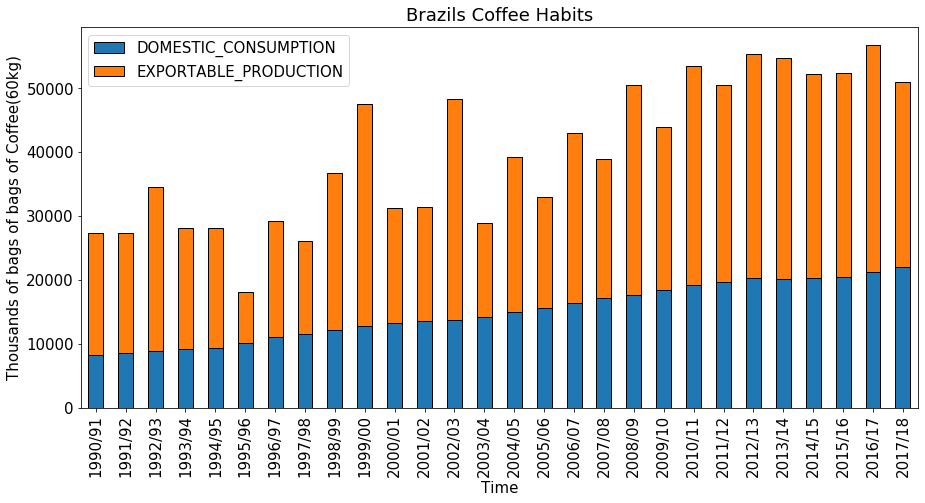

In [41]:
df_temp = df[df.COUNTRY == 'Brazil']
df_temp_2 = df_temp.loc[:,['DOMESTIC_CONSUMPTION',
       'EXPORTABLE_PRODUCTION']]
df_temp_2.set_index(df_temp.YEAR)
df_temp_2.plot.bar(stacked=True,figsize=(15,7),
                  edgecolor='k')

_ = plt.ylabel('Thousands of bags of bags of Coffee(60kg)')
_ = plt.xticks(ticks=range(len(df_temp.YEAR)),labels=df_temp.YEAR)
_ = plt.xlabel('Time')
_ = plt.title('Brazils Coffee Habits')

It seems as if the domestic consumption of coffee in Brazil has been steadily increasing along with the total production

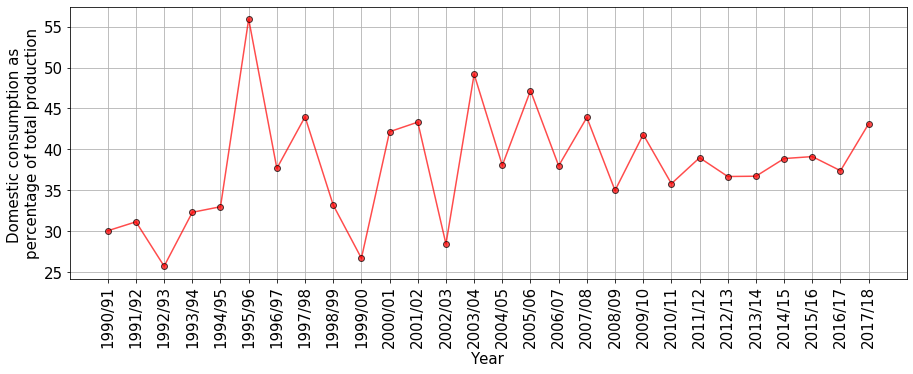

In [19]:
df_temp = df[df.COUNTRY == 'Brazil']
plt.figure(figsize=(15,5))
plt.plot(df_temp.YEAR,(df_temp.DOMESTIC_CONSUMPTION/df_temp.TOTAL_PRODUCTION)*100,
       color='red',
         marker='o',
         mec='k',
       alpha=0.7)

_ = plt.ylabel('Domestic consumption as \npercentage of total production',rotation = 90,fontsize=15)
_ = plt.xlabel('Year',fontsize=15)
_ = plt.xticks(rotation ='vertical')
_ = plt.grid()

However, after looking at consumption as a function of total production it doesn't seem to change over time. So as Brazil produces more, Brazil seems to drink more. 



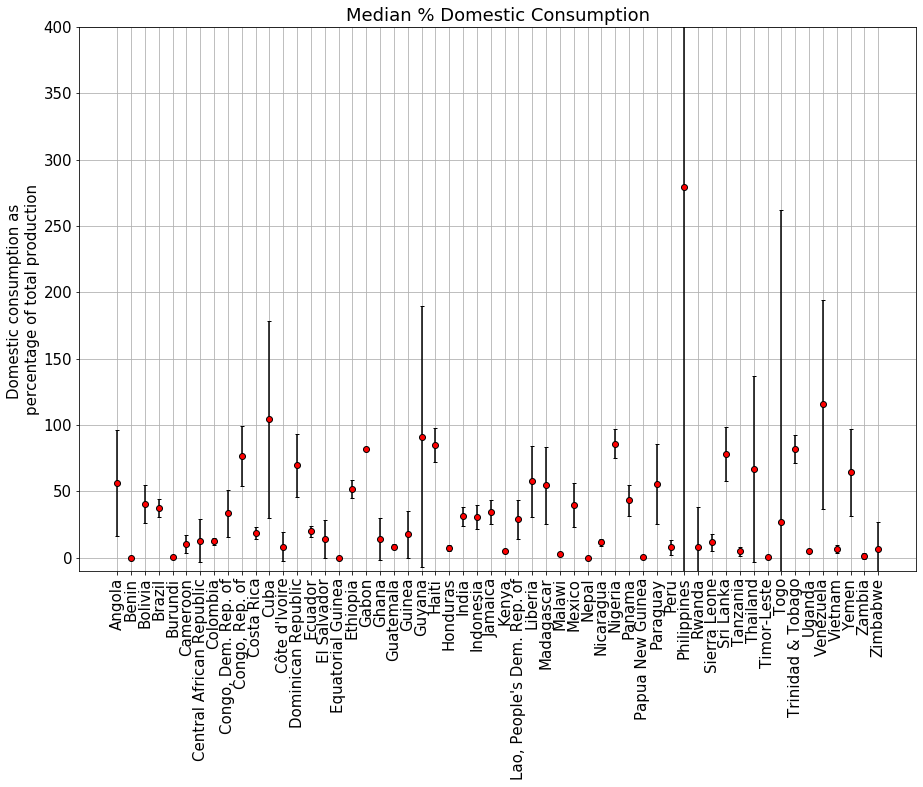

In [40]:
plt.figure(figsize = (15,10))
df2 = df['DOMESTIC_CONSUMPTION_%_error'] = (df.DOMESTIC_CONSUMPTION/df.TOTAL_PRODUCTION)*100
df2 = df.groupby('COUNTRY').sum().reset_index()
plt.errorbar(df2.COUNTRY,(df2.DOMESTIC_CONSUMPTION/df2.TOTAL_PRODUCTION)*100,
             yerr=df.groupby('COUNTRY').std().reset_index()['DOMESTIC_CONSUMPTION_%_error'],
             linestyle='none',
             ecolor='black',
             capsize=2,
             marker='o',
             mec='k',
             mfc='red',)
plt.grid()
_ = plt.title('Median % Domestic Consumption')
_ = plt.ylabel('Domestic consumption as \npercentage of total production',rotation = 90,fontsize=15)
_ = plt.xticks(rotation ='vertical')
_ = plt.ylim([-10,400])

Looks as if places like the Phillipines import more coffee for consumption than they produce. This is also highly variable year on year. Error bars represent 1 standard deviation. Countries close to 100 consume almost all they produce. 

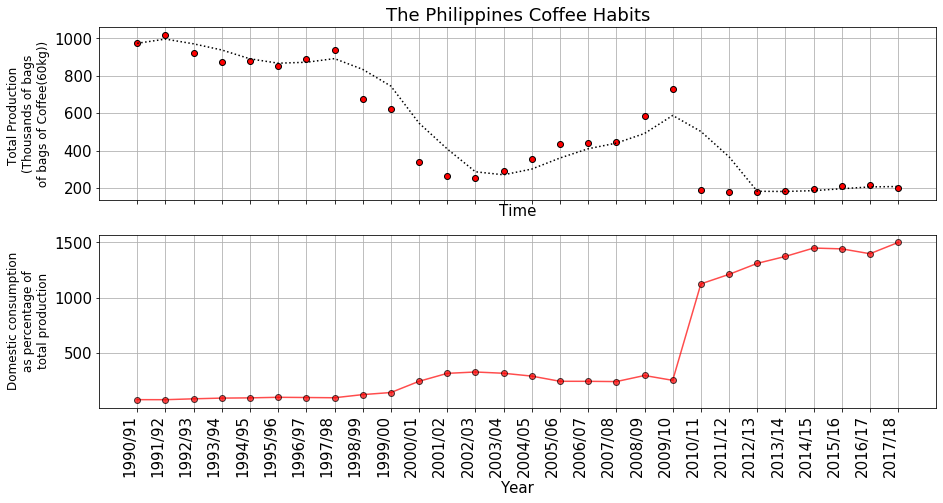

In [39]:
fig, ax = plt.subplots(2,1 , figsize = (15,7),sharex=True)
ax[0].set_title('The Philippines Coffee Habits')
dfBrazil = df[df.COUNTRY == 'Philippines']
ax[0].plot(dfBrazil.YEAR,dfBrazil.TOTAL_PRODUCTION,
        linestyle='none',
        marker='o',
        mec='k',
        mfc='r')
ax[0].plot(dfBrazil.YEAR,dfBrazil.loc[:,'TOTAL_PRODUCTION'].rolling(3,0).mean(),
        color='black',
        linestyle=':')

_ = ax[0].grid()
_ = ax[0].set_ylabel('Total Production \n(Thousands of bags\n of bags of Coffee(60kg)) ',rotation = 90,fontsize=12)
_ = ax[0].set_xlabel('Time',fontsize=15)




df_temp = df[df.COUNTRY == 'Philippines']
ax[1].plot(df_temp.YEAR,(df_temp.DOMESTIC_CONSUMPTION/df_temp.TOTAL_PRODUCTION)*100,
       color='red',
         marker='o',
         mec='k',
       alpha=0.7)

_ = ax[1].set_ylabel('Domestic consumption\n as percentage of \ntotal production',rotation = 90,fontsize=12)
_ = ax[1].set_xlabel('Year',fontsize=15)
_ = ax[1].grid()
_ = ax[1].set_xticklabels(dfBrazil.YEAR, rotation = 90, ha="right")



In [21]:
df2 = df.groupby('COUNTRY').sum()
df3 = df2.sort_values('TOTAL_PRODUCTION').iloc[0:10,:]
n = list(df3.index)
small = df[df.COUNTRY.isin(n)]

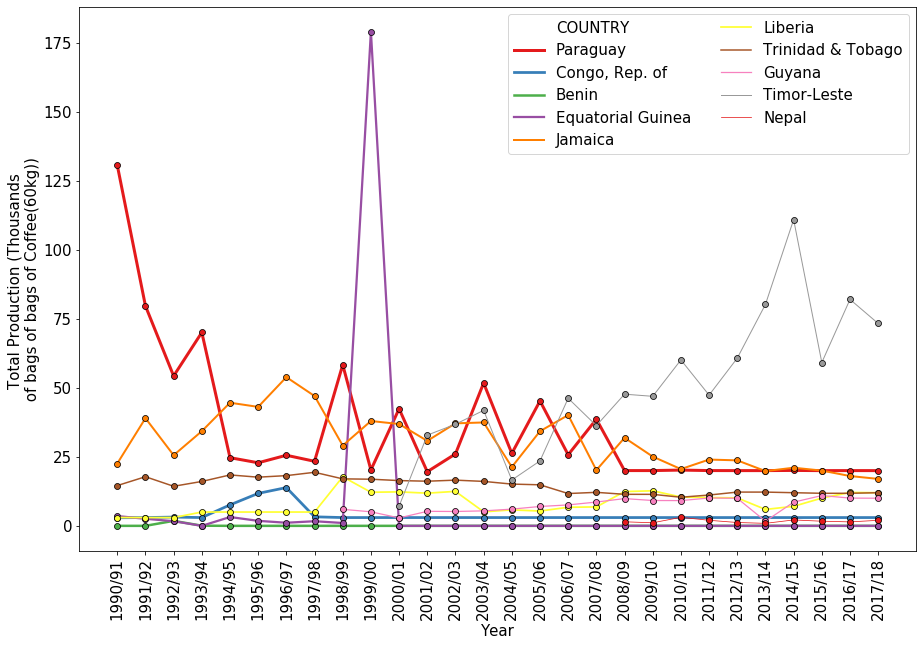

In [22]:
plt.figure(figsize = (15,10))
plt.xticks(rotation ='vertical')
colors = sns.color_palette('Set1',10)
sns.lineplot(x = 'YEAR', y= 'TOTAL_PRODUCTION',
             data = small,
             hue ='COUNTRY',
             palette= colors,
            mec='k',
             marker='o',
             size='COUNTRY'
            )

_ = plt.ylabel('Total Production (Thousands \n of bags of bags of Coffee(60kg)) ',rotation = 90,fontsize=15)
_ = plt.xlabel('Year',fontsize=15)

plt.legend(ncol=2)